In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии

In [ ]:
np.random.seed(11)

x = np.random.randn(1,100) # генерируем случайно несколько примеров входа, одномерный.
a, b = 5,-1 # коэффициенты зависимости в данных
eps = .5 * np.random.randn(1,100) # шум с нормальным распределением
y = b+ a*x + eps # примеры выхода

In [ ]:
new_ind = np.arange(100) #сгенерируем массив последовательных чисел по количесвту данных - индексы данных
np.random.shuffle(new_ind)# случайно перемешаем их (переставим элементы массива)

In [ ]:
train_idx = new_ind[:70]# первую часть индексов (с 0 до 69) определим как обучающие
test_idx = new_ind[70:]# вторую часть индексов (с 70 до конца=99) определим как тестовые
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x[0][train_idx], y[0][train_idx]# обучающие вход и желаемый выход
x_test, y_test = x[0][test_idx], y[0][test_idx]# тестовые вход и желаемый выход

In [ ]:
def plot_line_or_scatter(type_plot, x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):
    _, ax = plt.subplots()
    
    if type_plot == 'scatter':
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)
    
    else:
        ax.plot(x_data, y_data, lw = 2, color = color, alpha = 1)
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label) 

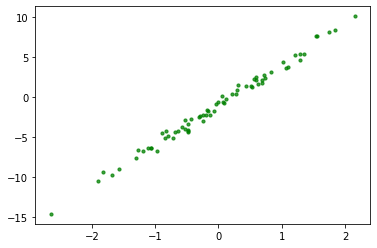

In [ ]:
plot_line_or_scatter('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа

In [ ]:
a = np.random.randn(1)
b = np.random.randn(1)

In [ ]:
lr = 10e-3 # шаг обучения
epochs = 100 # количество эпох

In [ ]:
Loss = [] # массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
  y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
  error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

  loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам 
  Loss.append(loss) # добавлем текущее значение в массив
  b_grad = 2* error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
  a_grad = a * (x_train*error).mean() # считаем производную по параметру, множителю a

  a = a - lr*a_grad # изменяем параметр a
  b = b - lr*b_grad # изменяем параметр b      
  
  if ep % 20 ==0 or ep ==epochs-1: # каждые 20 эпох будем
    print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 15.529048   a=2.048  b=1.448
ep:  20  loss: 6.197109   a=3.247  b=0.613
ep:  40  loss: 2.146061   a=4.174  b=0.070
ep:  60  loss: 0.859312   a=4.672  b=-0.284
ep:  80  loss: 0.467265   a=4.887  b=-0.516
ep:  99  loss: 0.333331   a=4.966  b=-0.662


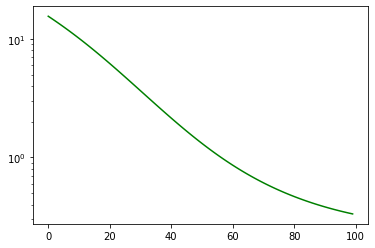

In [ ]:
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

In [ ]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

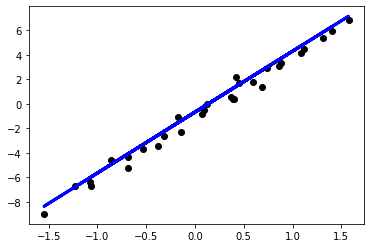

In [ ]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

Обученные параметры: b=-0.9730 a=5.0047


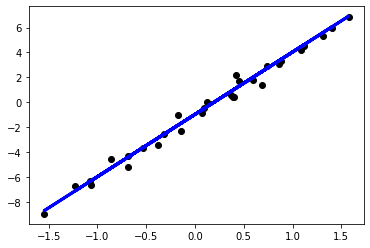

In [ ]:
linr = LinearRegression() # создадим регрессию
linr.fit(x_train.reshape(70, 1), y_train.reshape(70, 1)) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) 

y_test_pred=linr.predict(x_test.reshape(30,1))# посчитаем выход модели на тестовых примерах
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)# нарисуем его 
plt.scatter(x_test, y_test,  color='black') # и желаемый
plt.show()